In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [10]:
!pip install shap==0.42.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


Data Load and Visualization

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

import numpy as np
df = pd.read_csv('/gdrive/MyDrive/Network_DataAnalysis/Project/Single_EDFA_Dataset.csv')

inat_columns = [col for col in df.columns if col.startswith('inat')]

outnat_columns = [col for col in df.columns if col.startswith('outat')]


assert len(inat_columns) == len(outnat_columns)


input_matrix = df[inat_columns].copy()
output_matrix = df[outnat_columns].copy()


display(input_matrix)
display(output_matrix)


,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,inat153111,inat153158,inat153205,...,inat156260,inat156307,inat156354,inat156401,inat156448,inat156495,inat156542,inat156589,inat156636,inat156683
0,-20.262,-19.152,-19.402,-18.902,-19.052,-19.192,-19.172,-19.092,-19.212,-18.842,...,-16.472,-16.342,-16.282,-16.092,-15.972,-15.682,-15.452,-15.492,-15.582,-15.732
1,-20.798,-19.688,-20.338,-19.888,-19.898,-19.918,-19.868,-19.838,-19.858,-19.528,...,-17.418,-17.378,-17.168,-16.988,-16.898,-16.648,-16.328,-16.248,-16.288,-16.608
2,-21.227,-20.627,-21.417,-20.827,-20.847,-20.797,-20.807,-20.727,-20.787,-20.267,...,-18.377,-18.157,-18.017,-17.937,-17.787,-17.537,-17.187,-17.027,-16.897,-17.367
3,-23.007,-22.307,-22.907,-22.247,-22.187,-22.367,-22.217,-22.137,-22.287,-21.917,...,-19.877,-19.697,-19.537,-19.477,-19.287,-19.057,-18.757,-18.587,-18.237,-18.587
4,-24.132,-23.302,-23.952,-23.342,-23.122,-23.532,-23.632,-23.752,-23.772,-23.452,...,-20.952,-20.832,-20.622,-20.532,-20.432,-20.212,-19.862,-19.592,-19.262,-19.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,-22.505,-22.115,-22.765,-22.235,-22.135,-22.335,-22.125,-22.065,-22.015,-21.735,...,-23.625,-23.525,-23.415,-23.265,-22.955,-22.525,-22.195,-22.065,-21.735,-21.315
16493,-23.770,-23.090,-23.690,-23.280,-23.010,-23.670,-23.670,-23.730,-23.640,-23.360,...,-24.570,-24.500,-24.480,-24.280,-23.960,-23.680,-23.280,-23.100,-22.790,-22.300
16494,-24.769,-24.109,-24.669,-24.539,-24.569,-24.629,-24.349,-24.259,-24.169,-23.839,...,-25.339,-25.349,-25.289,-25.229,-24.899,-24.609,-24.379,-24.119,-23.669,-23.219
16495,-25.724,-24.864,-25.824,-25.354,-25.134,-25.354,-25.324,-25.294,-25.104,-24.714,...,-26.244,-26.234,-26.154,-26.154,-25.834,-25.574,-25.274,-25.104,-24.624,-24.074


,outat152782,outat152829,outat152876,outat152923,outat152970,outat153017,outat153064,outat153111,outat153158,outat153205,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
0,-18.736,-17.176,-16.996,-16.116,-15.856,-15.616,-15.196,-14.746,-14.536,-13.786,...,-0.876,-0.896,-0.916,-0.936,-0.966,-0.846,-0.826,-1.136,-1.446,-2.486
1,-17.462,-15.902,-16.152,-15.302,-14.902,-14.552,-14.142,-13.752,-13.432,-12.792,...,-1.062,-1.142,-1.082,-1.142,-1.192,-1.162,-1.052,-1.212,-1.502,-2.752
2,-15.955,-14.875,-15.225,-14.225,-13.875,-13.475,-13.095,-12.735,-12.505,-11.625,...,-1.285,-1.275,-1.295,-1.375,-1.455,-1.385,-1.265,-1.365,-1.515,-2.945
3,-14.989,-13.799,-13.949,-12.859,-12.579,-12.359,-11.799,-11.439,-11.449,-10.709,...,-1.599,-1.589,-1.619,-1.759,-1.849,-1.819,-1.749,-1.849,-1.799,-3.219
4,-14.292,-12.942,-13.162,-12.062,-11.612,-11.682,-11.432,-11.282,-11.222,-10.582,...,-1.692,-1.842,-1.812,-1.982,-2.152,-2.142,-2.052,-2.052,-2.072,-3.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,-11.438,-10.788,-11.028,-9.968,-9.728,-9.418,-8.978,-8.688,-8.548,-7.968,...,-3.938,-4.078,-4.128,-4.208,-4.258,-4.028,-4.018,-4.198,-4.138,-5.968
16493,-11.105,-10.165,-10.365,-9.455,-9.005,-9.335,-8.995,-8.765,-8.675,-8.085,...,-4.145,-4.345,-4.385,-4.565,-4.505,-4.465,-4.335,-4.535,-4.565,-6.455
16494,-10.572,-9.582,-9.842,-9.172,-8.942,-8.572,-8.072,-7.802,-7.682,-7.132,...,-4.142,-4.492,-4.612,-4.792,-4.772,-4.762,-4.832,-4.862,-4.772,-6.812
16495,-9.912,-8.852,-9.602,-8.412,-8.132,-7.962,-7.642,-7.362,-7.142,-6.522,...,-4.382,-4.802,-4.802,-5.152,-5.152,-5.092,-5.142,-5.292,-5.182,-7.162


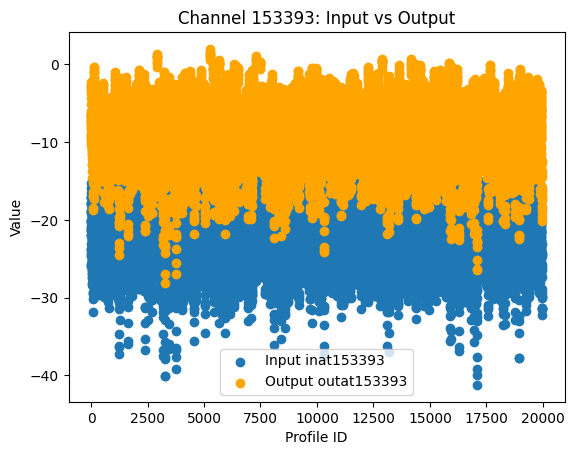

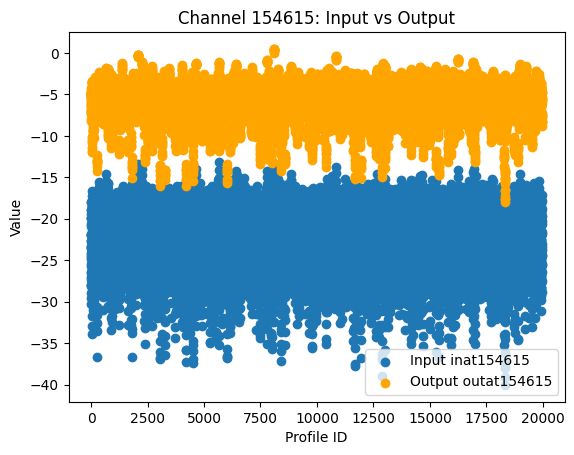

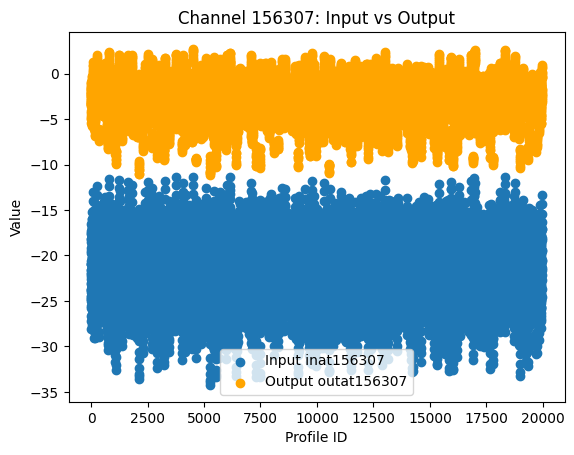

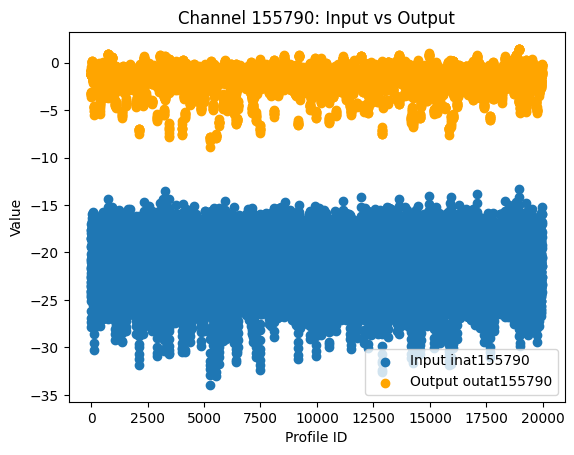

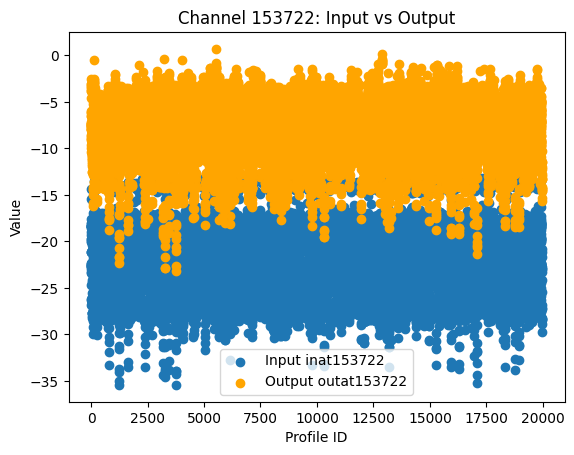

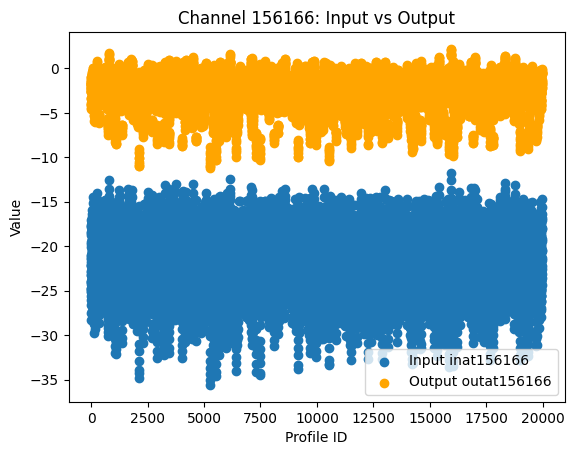

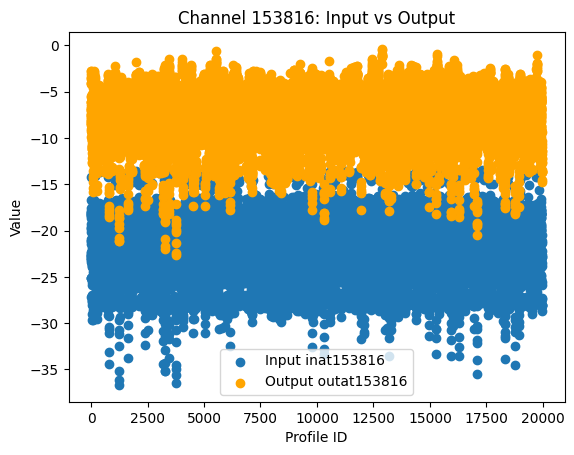

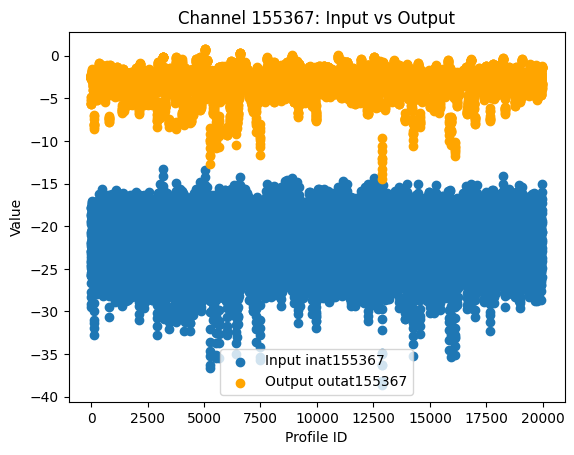

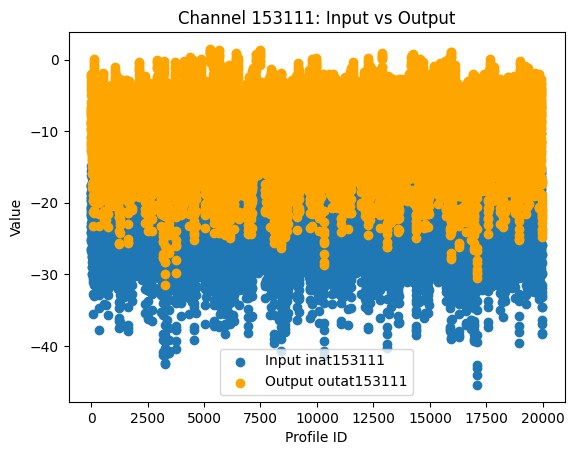

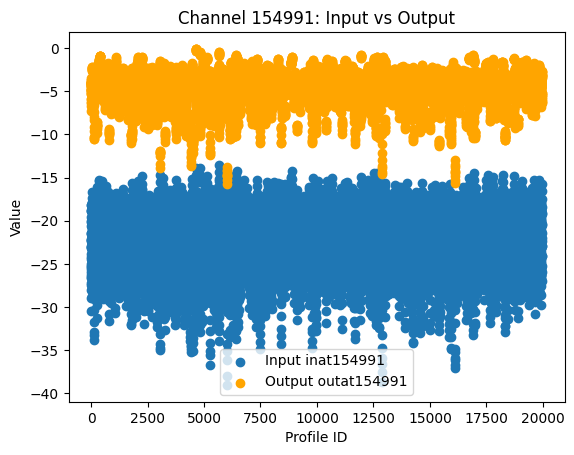

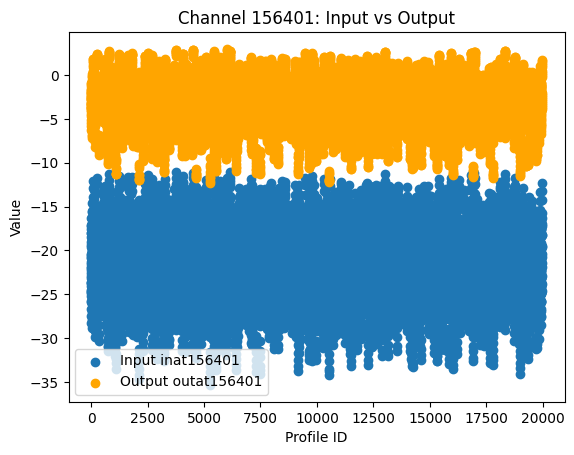

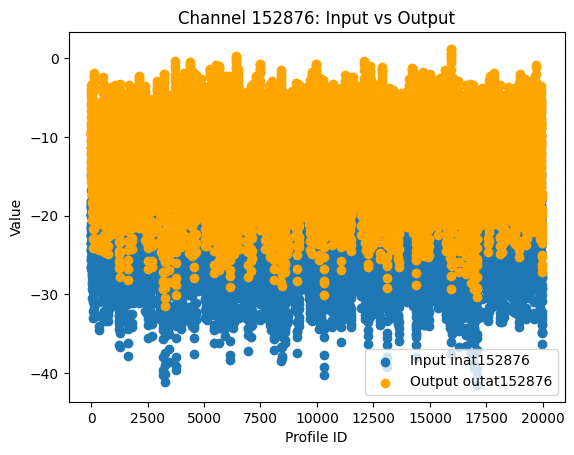

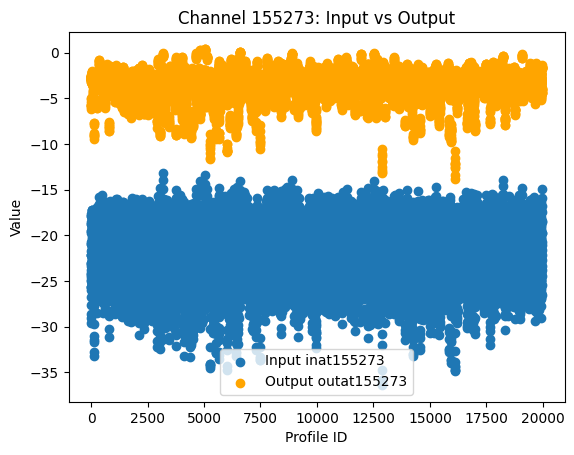

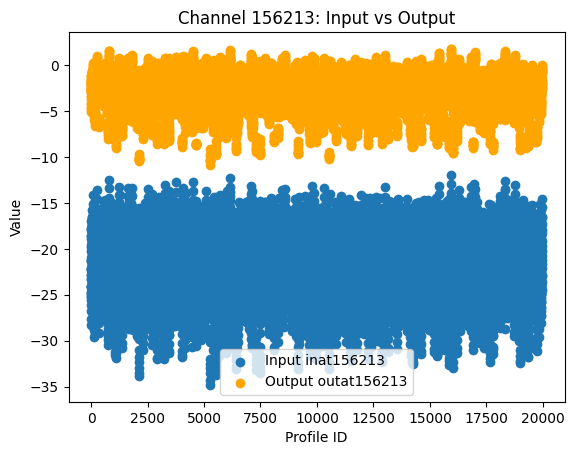

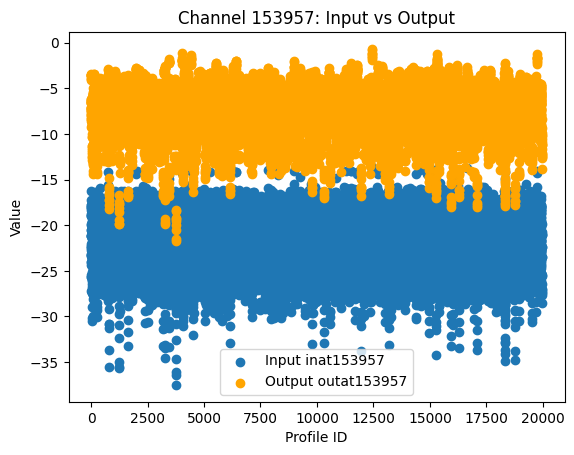

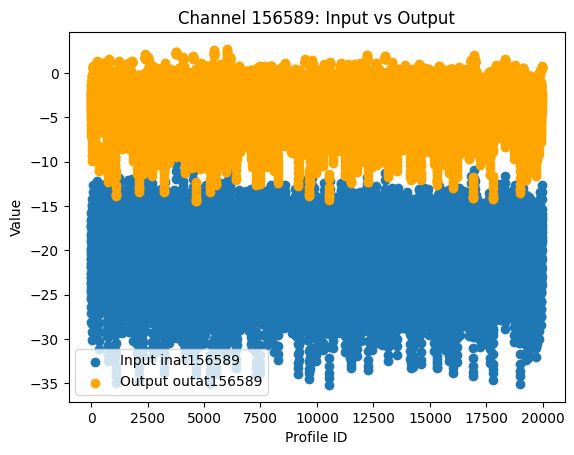

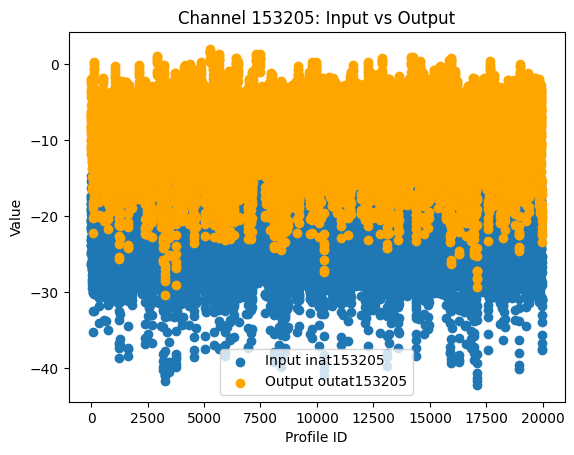

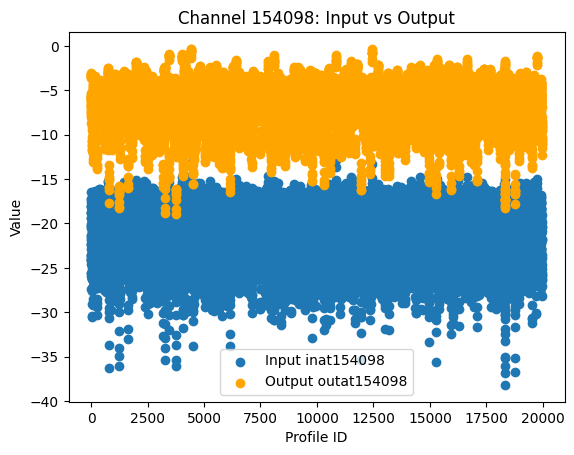

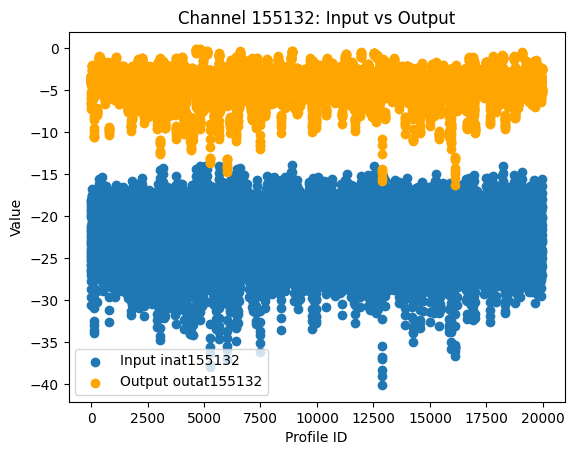

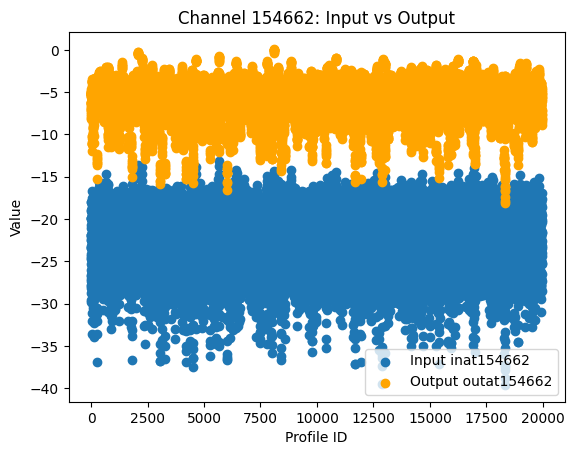

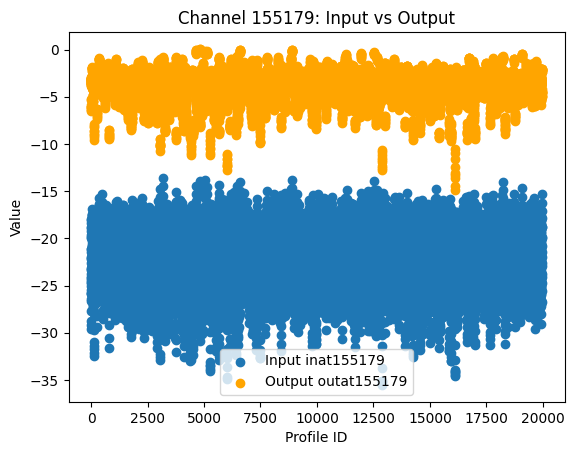

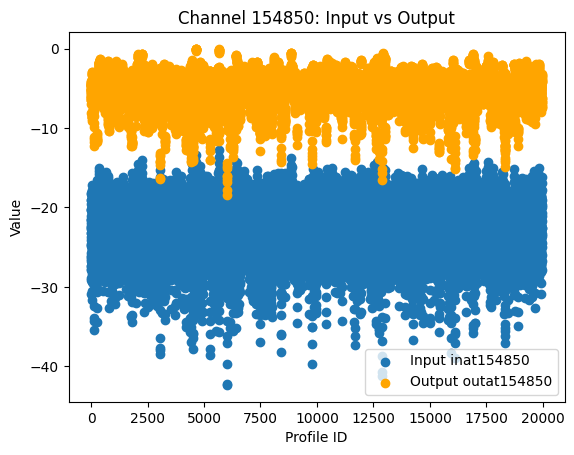

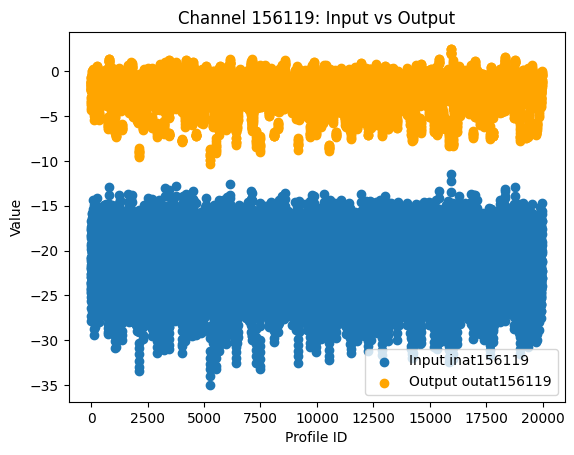

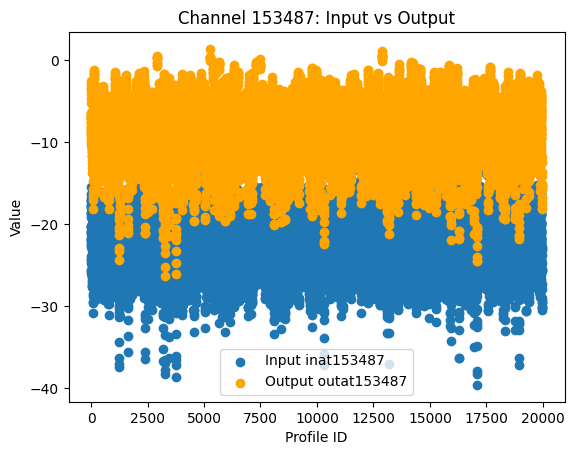

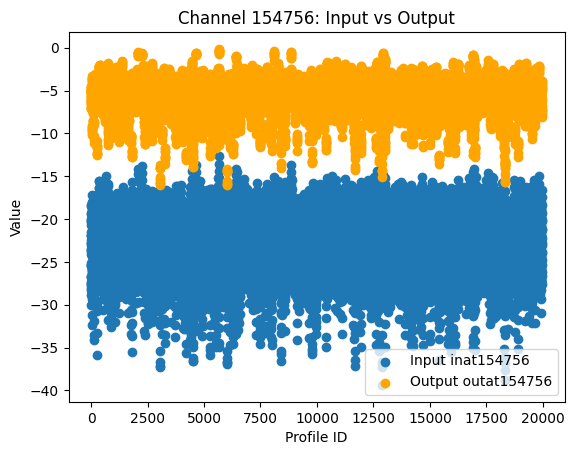

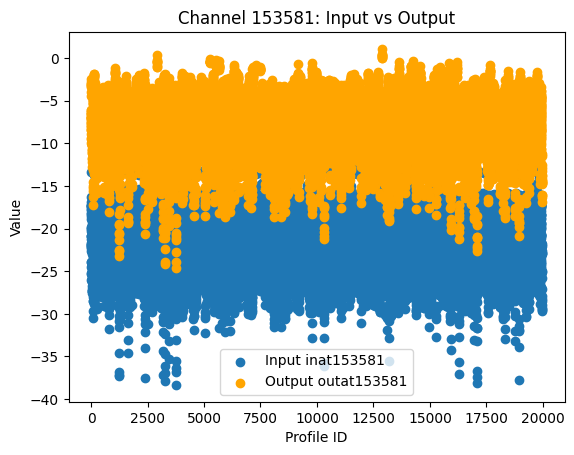

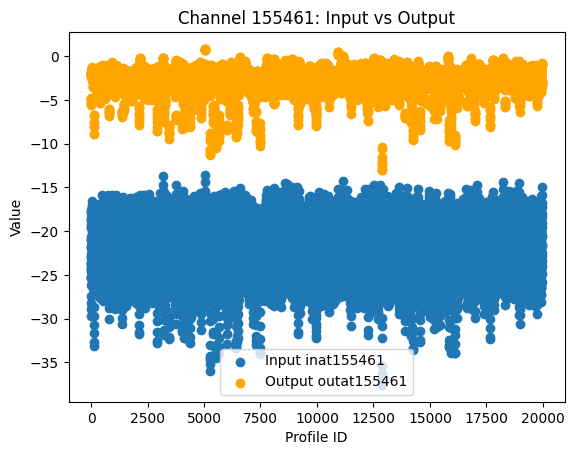

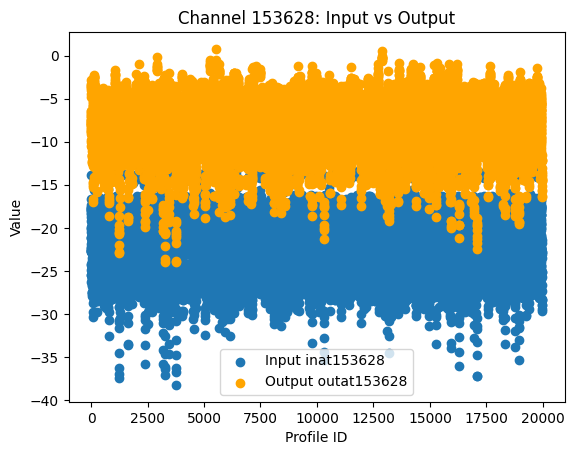

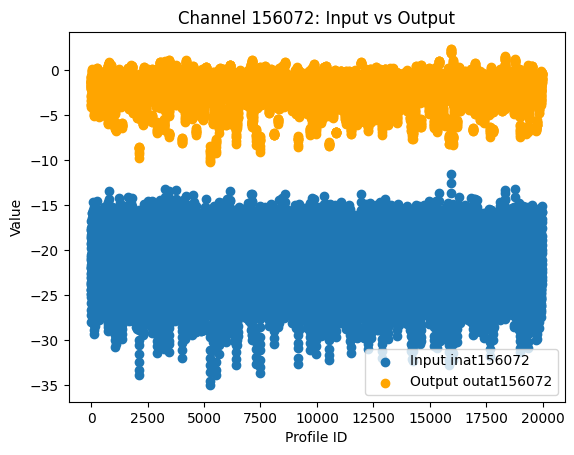

KeyboardInterrupt: 

In [ ]:
input_columns = [col for col in df.columns if col.startswith('inat')]
output_columns = [col for col in df.columns if col.startswith('outat')]
common_suffixes = set([col[4:] for col in input_columns]).intersection(set([col[5:] for col in output_columns]))


# Plot each matching input and output channel as scatter plots
for suffix in common_suffixes:
    input_col = f'inat{suffix}'
    output_col = f'outat{suffix}'
    plt.figure()
    plt.scatter(df['profileId'], df[input_col], label=f'Input {input_col}')
    plt.scatter(df['profileId'], df[output_col], label=f'Output {output_col}', color='orange')
    plt.xlabel('Profile ID')
    plt.ylabel('Value')
    plt.title(f'Channel {suffix}: Input vs Output')
    plt.legend()
    plt.show()


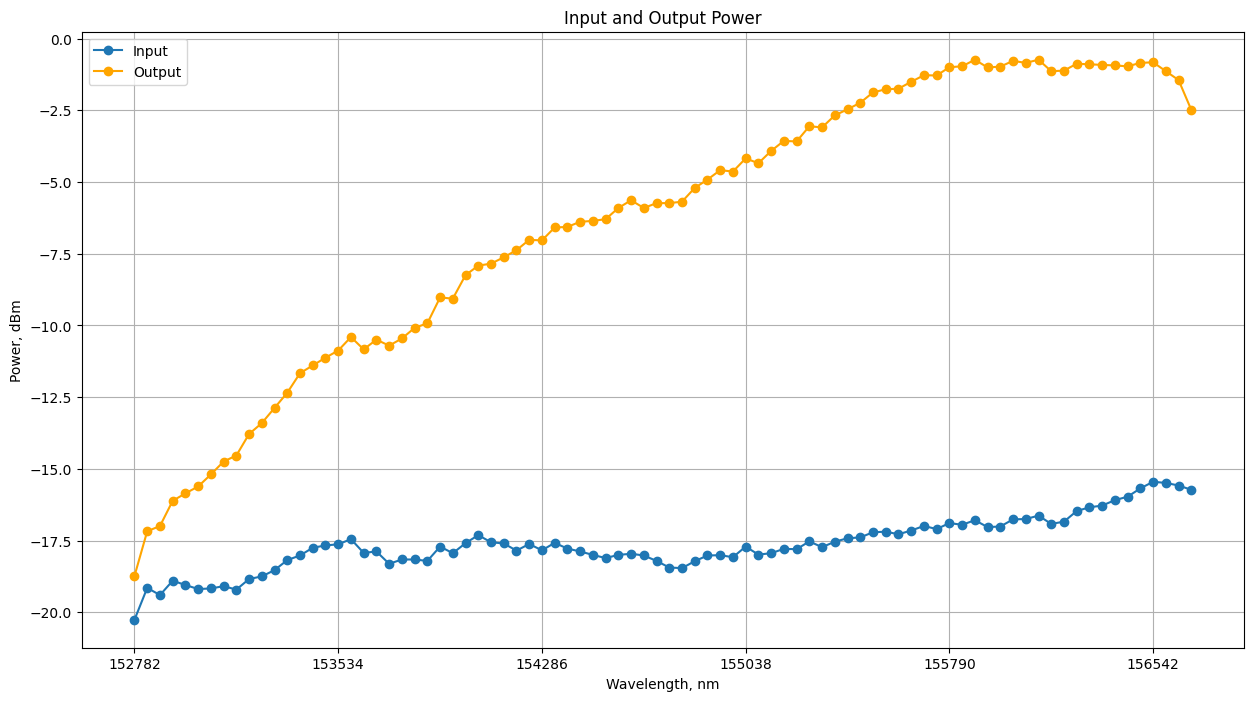

In [ ]:
# Extracting data for the first profile
first_profile_data = df.iloc[0]

# Separating input and output columns for the first profile
first_profile_input = first_profile_data[input_columns]
first_profile_output = first_profile_data[output_columns]

# Removing 'inat' and 'outat' prefixes
input_labels = [col[4:] for col in input_columns]
output_labels = [col[5:] for col in output_columns]

# Determine indices for x-axis labels to avoid clutter
label_indices = range(0, len(input_labels), max(1, len(input_labels)//5))

# Plotting inputs and outputs for the first profile
plt.figure(figsize=(15, 8))

# Plot input channels
plt.plot(input_labels, first_profile_input, label='Input', marker='o', linestyle='-')

# Plot output channels
plt.plot(output_labels, first_profile_output, label='Output', marker='o', linestyle='-', color='orange')

plt.xlabel('Wavelength, nm')
plt.ylabel('Power, dBm')
plt.title('Input and Output Power')
plt.legend()

# Set fewer x-axis labels
plt.xticks(ticks=label_indices, labels=[input_labels[i] for i in label_indices])

plt.grid(True)
plt.show()


Training KNN model with N=1.....
Training duration with N=1: 1.1315 seconds
Mean Squared Error with N=1: 0.1966251432323234
Mean Absolute Error with N=1: 0.2780373448773446
R2 score with N=1: 0.9524327190725134
Training KNN model with N=2.....
Training duration with N=2: 1.1251 seconds
Mean Squared Error with N=2: 0.15658436716089466
Mean Absolute Error with N=2: 0.24730258658008641
R2 score with N=2: 0.9602623154066509
Training KNN model with N=3.....
Training duration with N=3: 0.9680 seconds
Mean Squared Error with N=3: 0.15451762623055962
Mean Absolute Error with N=3: 0.2439816161616162
R2 score with N=3: 0.9603717813670356
Training KNN model with N=4.....
Training duration with N=4: 1.0919 seconds
Mean Squared Error with N=4: 0.1624670663501083
Mean Absolute Error with N=4: 0.24711789141414153
R2 score with N=4: 0.9573819632021807
Training KNN model with N=5.....
Training duration with N=5: 0.6032 seconds
Mean Squared Error with N=5: 0.16940817676709963
Mean Absolute Error with N=

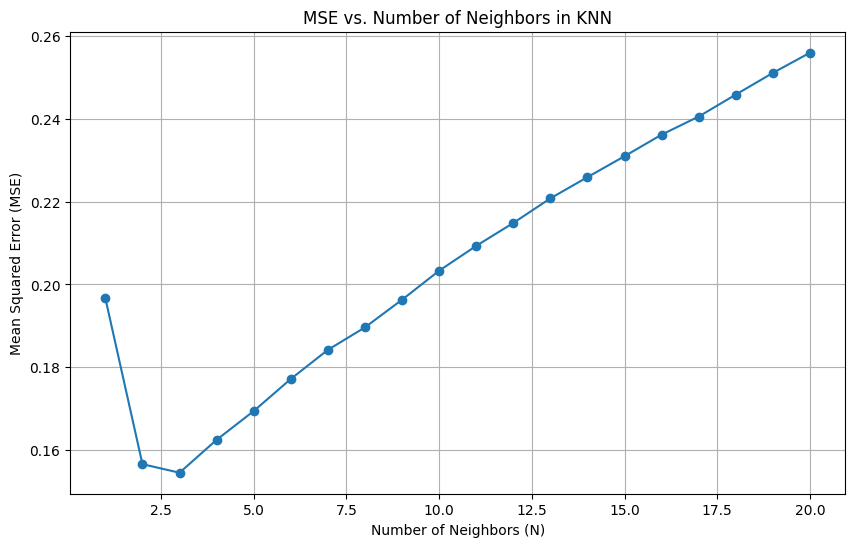

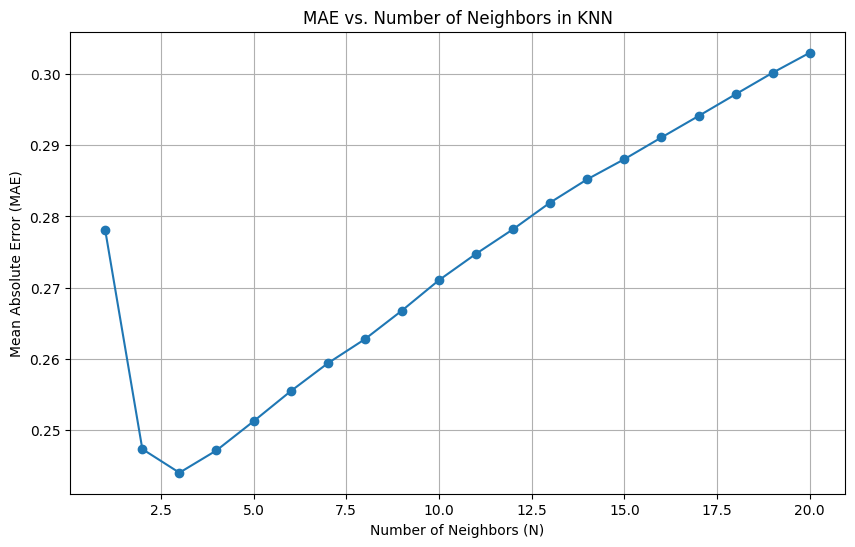

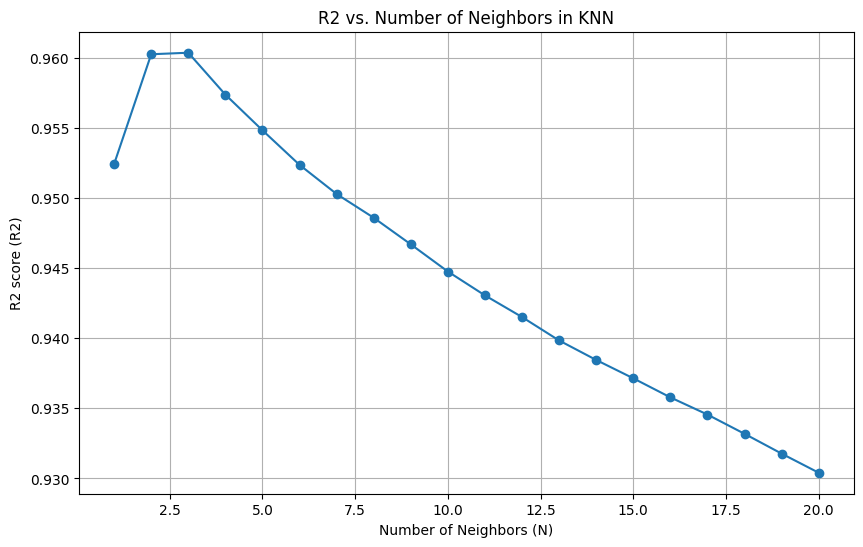

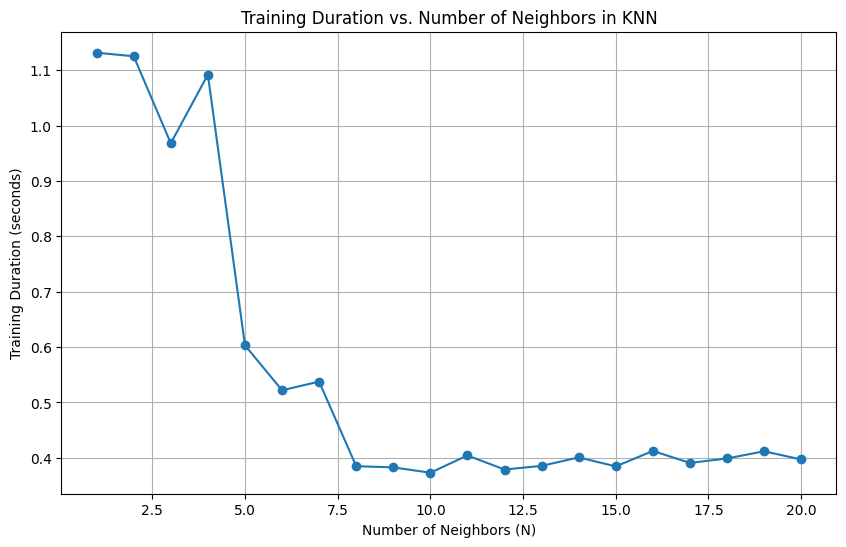

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time
import numpy as np

# Assuming input_matrix and output_matrix are defined
X_train, X_test, y_train, y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)

n_neighbors = range(1, 21)
mse_values = []
r2_values = []
mae_values = []
train_durations = []

for n in n_neighbors:
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f'Training KNN model with N={n}.....')

    training_duration = time.time() - start_time
    train_durations.append(training_duration)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    score = r2_score(y_test, y_pred)
    r2_values.append(score)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

    print(f'Training duration with N={n}: {training_duration:.4f} seconds')
    print(f'Mean Squared Error with N={n}: {mse}')
    print(f'Mean Absolute Error with N={n}: {mae}')
    print(f'R2 score with N={n}: {score}')

# Plotting MSE vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

# Plotting MAE vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mae_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

# Plotting R2 vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('R2 score (R2)')
plt.title('R2 vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

# Plotting Training Duration vs. Number of Neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, train_durations, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Training Duration (seconds)')
plt.title('Training Duration vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


KNN Standardize

Training KNN model......
Training duration with N=1 : 1.1215 seconds
Mean Squared Error with N=1 : 0.1995089313852815
Mean Absolute Error with N=1 : 0.2780340404040401
R2 score with N=1 : 0.9547460851765434
Training KNN model......
Training duration with N=2 : 0.9039 seconds
Mean Squared Error with N=2 : 0.1589903122222222
Mean Absolute Error with N=2 : 0.24693716810966798
R2 score with N=2 : 0.9623090064496593
Training KNN model......
Training duration with N=3 : 1.1703 seconds
Mean Squared Error with N=3 : 0.15535839219977557
Mean Absolute Error with N=3 : 0.24373080567580563
R2 score with N=3 : 0.9620301127041065
Training KNN model......
Training duration with N=4 : 0.6931 seconds
Mean Squared Error with N=4 : 0.16181222994949507
Mean Absolute Error with N=4 : 0.24629696969696968
R2 score with N=4 : 0.9595993130412158
Training KNN model......
Training duration with N=5 : 0.6470 seconds
Mean Squared Error with N=5 : 0.168746084146609
Mean Absolute Error with N=5 : 0.25007204473304473

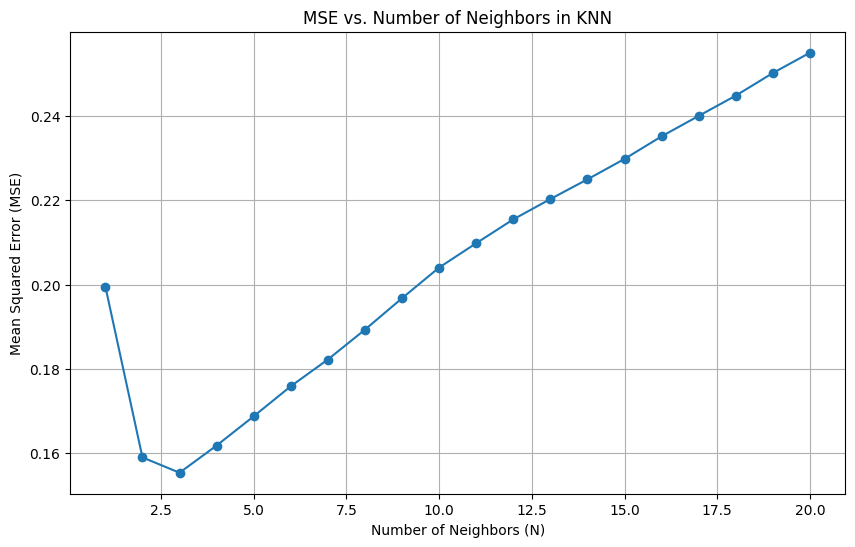

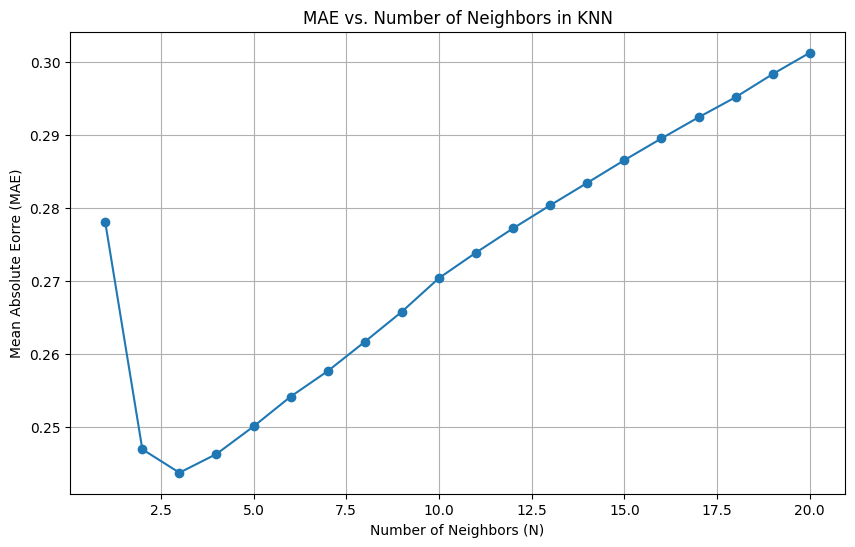

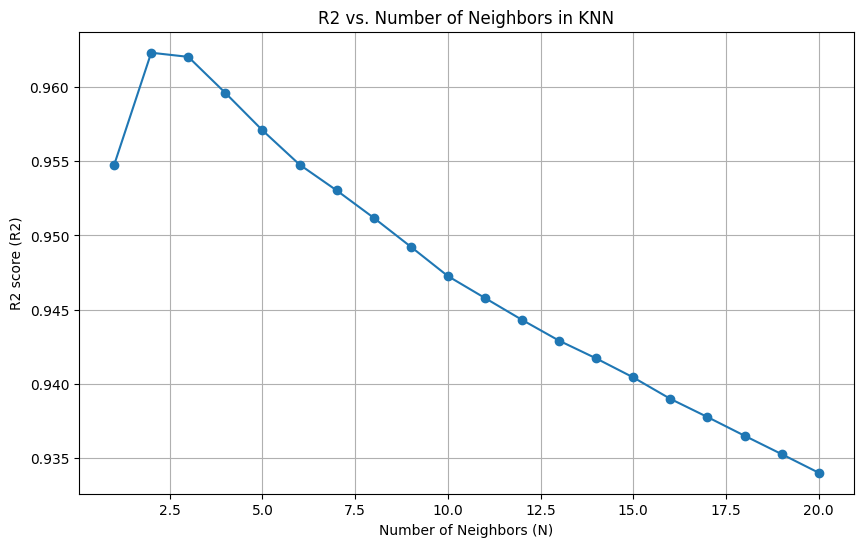

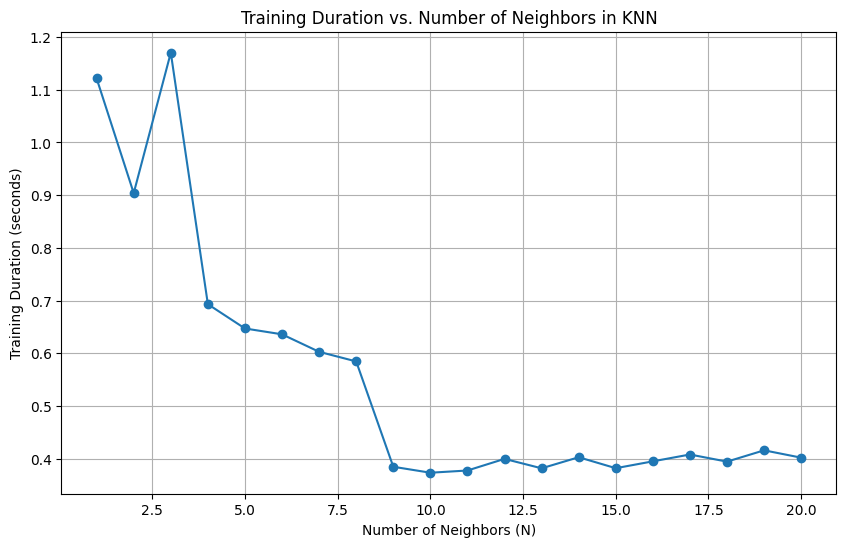

In [7]:
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)



n_neighbors = range(1, 21)
mse_values1 = []
r2_values1=[]
mae_values1=[]
train_durations1=[]

for n in n_neighbors:
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f'Training KNN model......')

    training_duration = time.time() - start_time
    train_durations1.append(training_duration)

    mse = mean_squared_error(y_test, y_pred)
    mse_values1.append(mse)

    score=r2_score(y_test,y_pred)
    r2_values1.append(score)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values1.append(mae)


    print(f'Training duration with N={n} : {training_duration:.4f} seconds')
    print(f'Mean Squared Error with N={n} : {mse}')
    print(f'Mean Absolute Error with N={n} : {mae}')
    print(f'R2 score with N={n} : {score}')

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mse_values1, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mae_values1, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Absolute Eorre (MAE)')
plt.title('MAE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, r2_values1, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('R2 score (R2)')
plt.title('R2 vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, train_durations1, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Training Duration (seconds)')
plt.title('Training Duration vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

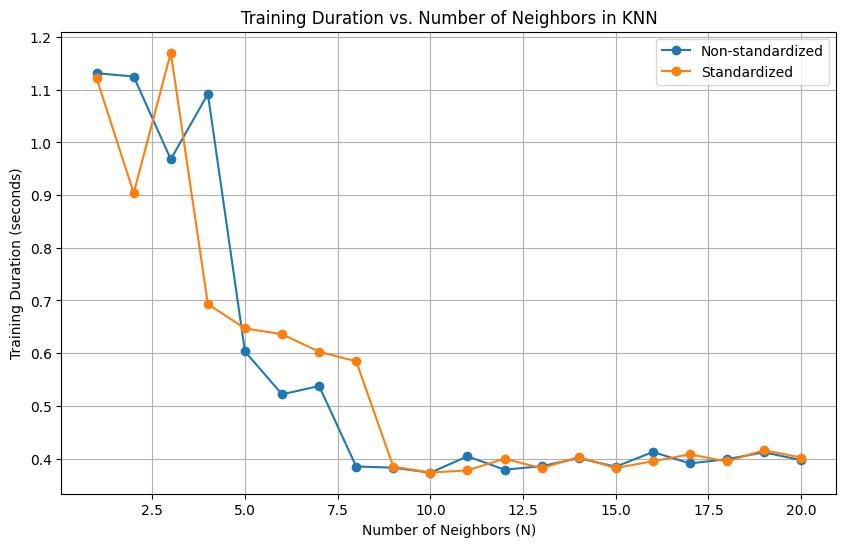

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, train_durations, marker='o', linestyle='-', label='Non-standardized')
plt.plot(n_neighbors, train_durations1, marker='o', linestyle='-', label='Standardized')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Training Duration (seconds)')
plt.title('Training Duration vs. Number of Neighbors in KNN')
plt.legend()
plt.grid(True)
plt.show()


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

import numpy as np


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)


n_estimators_range = range(10, 100, 10)
criterion = ['squared_error', 'friedman_mse']


mse_values_rf = {crit: [] for crit in criterion}
mae_values_rf = {crit: [] for crit in criterion}
r2_values_rf = {crit: [] for crit in criterion}
train_durations_rf = {crit: [] for crit in criterion}

for crit in criterion:
  for n in n_estimators_range:

      start_time = time.time()

      rf = RandomForestRegressor(n_estimators=n, random_state=42, criterion=crit)
      rf.fit(X_train_rf, y_train_rf)

      training_duration = time.time() - start_time
      train_durations_rf[crit].append(training_duration)

      y_pred_rf = rf.predict(X_test_rf)

      mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
      mse_values_rf[crit].append(mse_rf)

      mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
      mae_values_rf[crit].append(mae_rf)

      r2_rf = r2_score(y_test_rf, y_pred_rf)
      r2_values_rf[crit].append(r2_rf)

      print(f'Start Training..............')
      print(f'Criterion: {crit}')
      print(f'Number of Estimators: {n}')
      print(f'Training duration: {training_duration:.4f} seconds')
      print(f'Mean Squared Error: {mse_rf}')
      print(f'Mean Absolute Error: {mae_rf}')
      print(f'R2 score: {r2_rf}')



Start Training..............
Criterion: squared_error
Number of Estimators: 10
Training duration: 33.4508 seconds
Mean Squared Error: 0.2834089541457431
Mean Absolute Error: 0.30727269408369406
R2 score: 0.9315302530127202
Start Training..............
Criterion: squared_error
Number of Estimators: 20
Training duration: 69.6776 seconds
Mean Squared Error: 0.25556909725003607
Mean Absolute Error: 0.2876789062049062
R2 score: 0.9376769261927594
Start Training..............
Criterion: squared_error
Number of Estimators: 30
Training duration: 100.6613 seconds
Mean Squared Error: 0.24771668097598204
Mean Absolute Error: 0.28182105122655116
R2 score: 0.93944166945952
Start Training..............
Criterion: squared_error
Number of Estimators: 40
Training duration: 136.3144 seconds
Mean Squared Error: 0.2414639065305375
Mean Absolute Error: 0.27781674404761914
R2 score: 0.9409720223596884
Start Training..............
Criterion: squared_error
Number of Estimators: 50
Training duration: 169.0399 

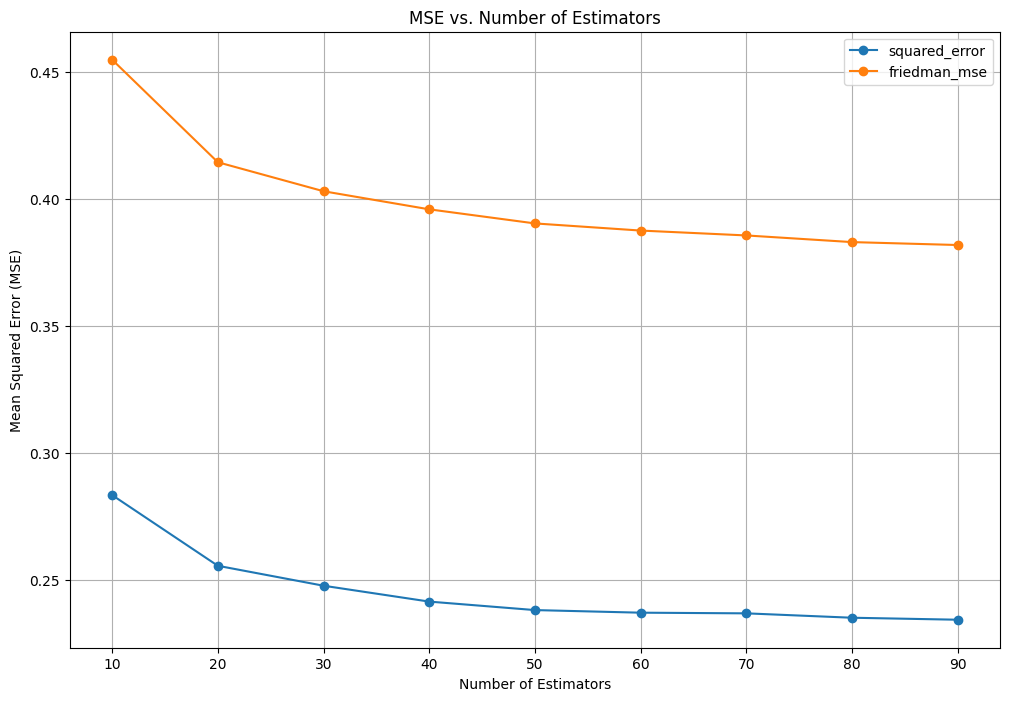

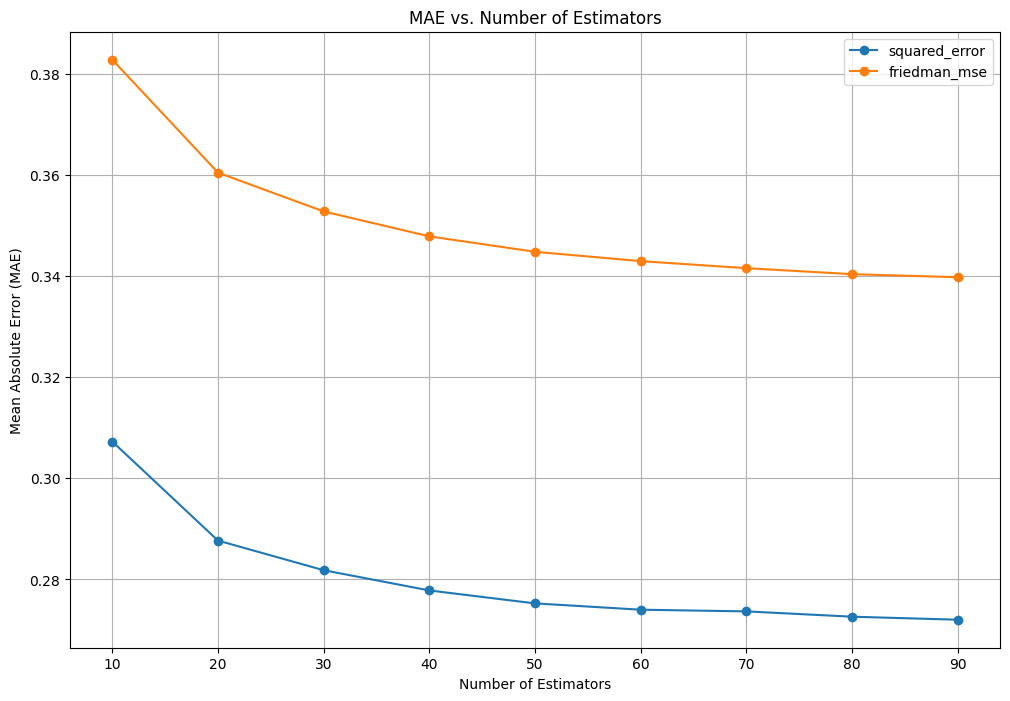

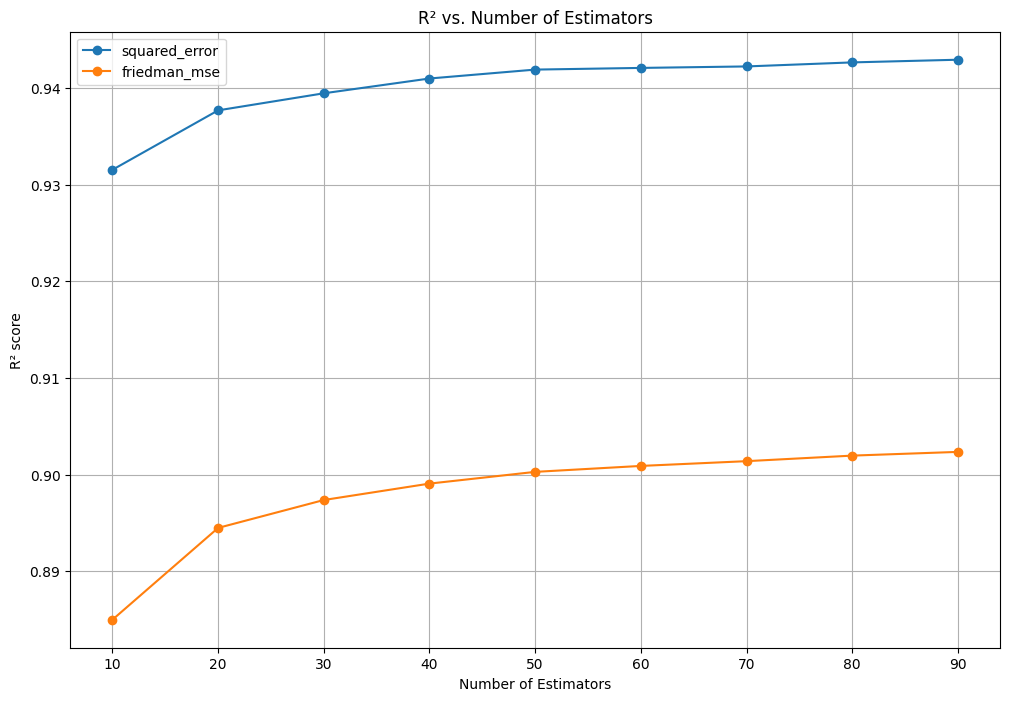

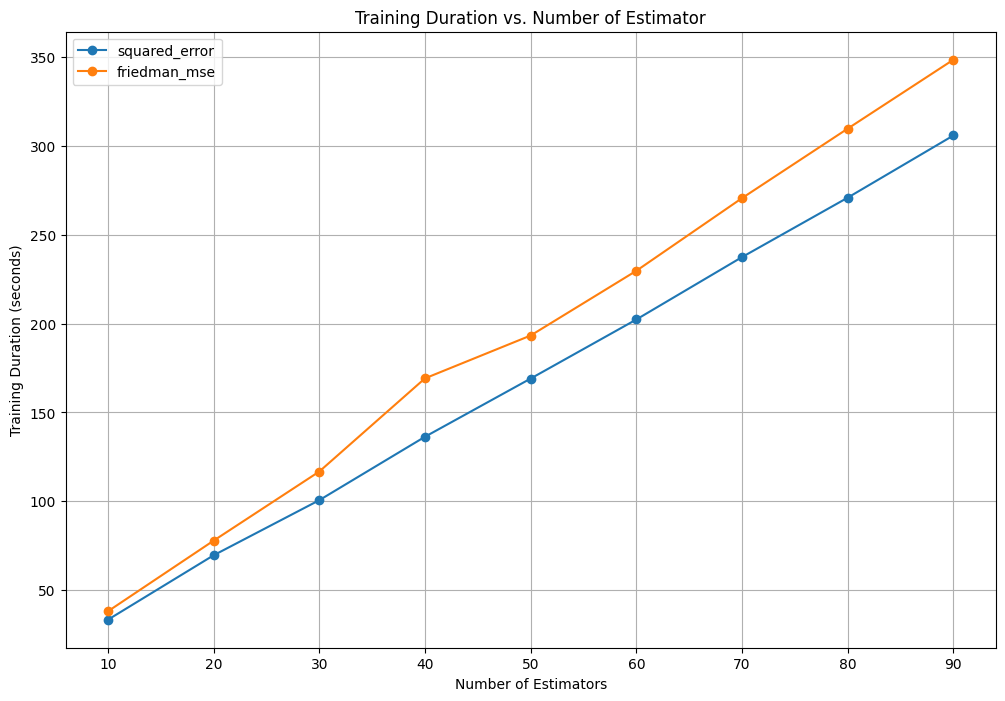

In [ ]:
plt.figure(figsize=(12, 8))
for crit in criterion:
    plt.plot(n_estimators_range[:len(mse_values_rf[crit])], mse_values_rf[crit], marker='o', linestyle='-', label=crit)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for crit in criterion:
    plt.plot(n_estimators_range[:len(mae_values_rf[crit])], mae_values_rf[crit], marker='o', linestyle='-', label=crit)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for crit in criterion:
    plt.plot(n_estimators_range[:len(r2_values_rf[crit])], r2_values_rf[crit], marker='o', linestyle='-', label=crit)
plt.xlabel('Number of Estimators')
plt.ylabel('R² score')
plt.title('R² vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for crit in criterion:
    plt.plot(n_estimators_range[:len(train_durations_rf[crit])], train_durations_rf[crit], marker='o', linestyle='-', label=crit)
plt.xlabel('Number of Estimators')
plt.ylabel('Training Duration (seconds)')
plt.title('Training Duration vs. Number of Estimator')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_rf = scaler_X.fit_transform(X_train_rf)
X_test_rf = scaler_X.transform(X_test_rf)

n_estimators_range = range(10, 100, 10)
mse_values_rf = []
mae_values_rf = []
r2_values_rf = []
train_durations_rf1 = []

for n in n_estimators_range:
    start_time = time.time()

    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train_rf, y_train_rf)

    training_duration = time.time() - start_time
    train_durations_rf1.append(training_duration)

    y_pred_rf = rf.predict(X_test_rf)

    mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
    mse_values_rf.append(mse_rf)

    mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
    mae_values_rf.append(mae_rf)

    r2_rf = r2_score(y_test_rf, y_pred_rf)
    r2_values_rf.append(r2_rf)


    print(f'Training duration with {n} estimators: {training_duration:.4f} seconds')


    print(f'Mean Squared Error with {n} estimators: {mse_rf}')
    print(f'Mean Absolute Error with {n} estimators: {mae_rf}')
    print(f'R2 score with {n} estimators: {r2_rf}')




Training duration with 10 estimators: 40.9050 seconds
Mean Squared Error with 10 estimators: 0.2833639300890331
Mean Absolute Error with 10 estimators: 0.3072593715728715
R2 score with 10 estimators: 0.9315306188012028
Training duration with 20 estimators: 69.2953 seconds
Mean Squared Error with 20 estimators: 0.25552222300068544
Mean Absolute Error with 20 estimators: 0.287683189033189
R2 score with 20 estimators: 0.9376903593269924
Training duration with 30 estimators: 137.3825 seconds
Mean Squared Error with 30 estimators: 0.24768382136426162
Mean Absolute Error with 30 estimators: 0.28181527705627707
R2 score with 30 estimators: 0.9394488764851135
Training duration with 40 estimators: 145.2519 seconds
Mean Squared Error with 40 estimators: 0.24145167768759018
Mean Absolute Error with 40 estimators: 0.27782250216450227
R2 score with 40 estimators: 0.9409736306055033
Training duration with 50 estimators: 167.9591 seconds
Mean Squared Error with 50 estimators: 0.23811793409997692
Mean

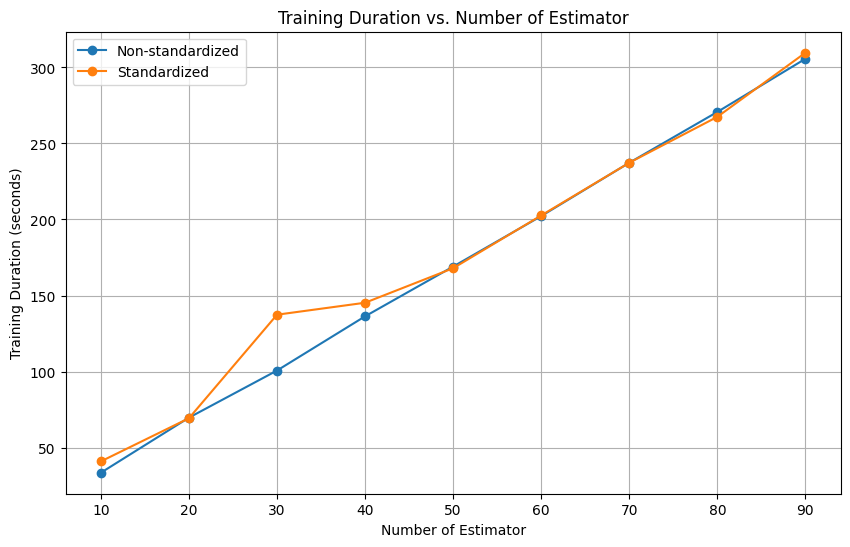

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_durations_rf[criterion[0]], marker='o', linestyle='-',label='Non-standardized')
plt.plot(n_estimators_range, train_durations_rf1, marker='o', linestyle='-',label='Standardized')
plt.xlabel('Number of Estimator')
plt.ylabel('Training Duration (seconds)')
plt.title('Training Duration vs. Number of Estimator')
plt.legend()
plt.grid(True)
plt.show()

XAI for XGB Regressor

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import shap
import shap.plots


X_train, X_test, y_train, y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Mean Squared Error: 0.13205294217591004
Mean Absolute Error: 0.24152596746738167
R^2 Score: 0.9703551495913955


In [12]:
explainer_shap = shap.TreeExplainer(model)

shap_values = explainer_shap.shap_values(X_train)

shap_values

[17:28:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


[array([[ 7.5019842e-01,  4.0710351e-01,  2.5192159e-01, ...,
          3.6093664e-01,  3.1919831e-03,  6.6993263e-04],
        [-2.7035980e+00, -8.1009191e-01, -6.1016423e-01, ...,
         -4.6260583e-01,  8.3814021e-03, -4.3353718e-04],
        [-1.2357356e-01,  1.7737541e-01, -6.8310939e-02, ...,
          4.1127196e-01, -7.7431332e-03,  6.6993263e-04],
        ...,
        [-2.0218585e+00, -2.1241343e-01, -1.8398926e-01, ...,
          5.5010027e-01,  2.5624083e-03,  2.8490406e-03],
        [ 2.1700016e-01,  2.7991244e-01, -7.1522646e-02, ...,
          4.2128560e-01,  2.2641383e-03,  6.6993263e-04],
        [ 1.7213968e+00,  2.9653704e-01,  4.5175023e-02, ...,
         -5.1480114e-01,  7.5572855e-03, -4.1205725e-03]], dtype=float32),
 array([[ 0.08803253,  0.580248  ,  0.08819933, ...,  0.35639608,
          0.00576808,  0.03451452],
        [-1.2764835 , -1.8481709 , -0.56225115, ..., -0.48825568,
          0.01224783, -0.01633407],
        [-0.05170781, -0.0289598 ,  0.0835548 

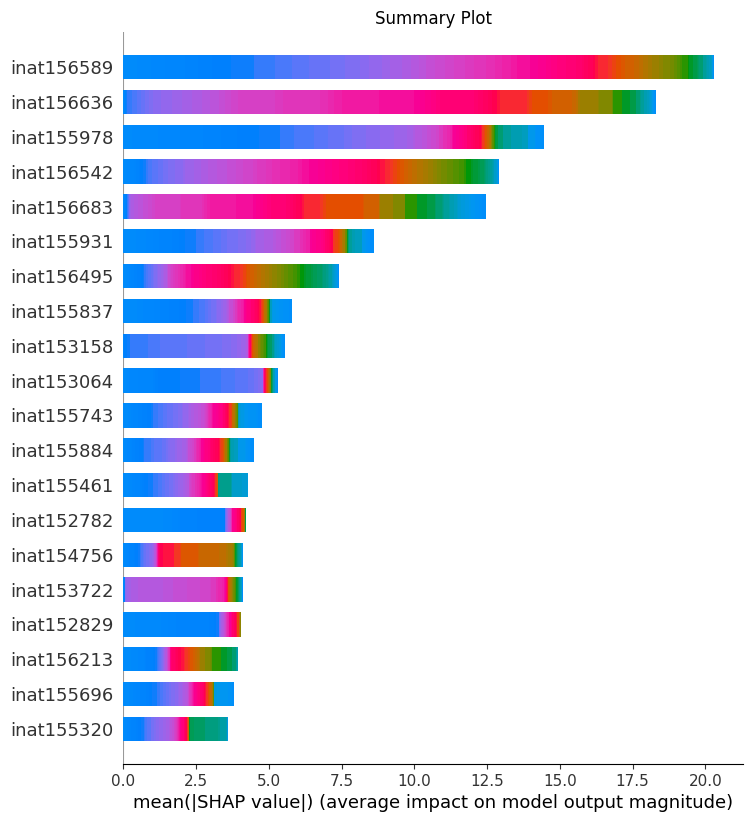

In [ ]:
shap.summary_plot(shap_values, feature_names=list(input_matrix.columns), show = False)
plt.title("Summary Plot")
fig = plt.gcf()
ax = fig.gca()
ax.get_legend().remove()

plt.show()

In [ ]:
names=list(output_matrix)
for i in range(len(names)):
  name=names[i]
  shap.summary_plot(shap_values[i],X_train,feature_names=list(input_matrix.columns), show = False,max_display=10)
  plt.title(f'Summary Plot for {name}')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

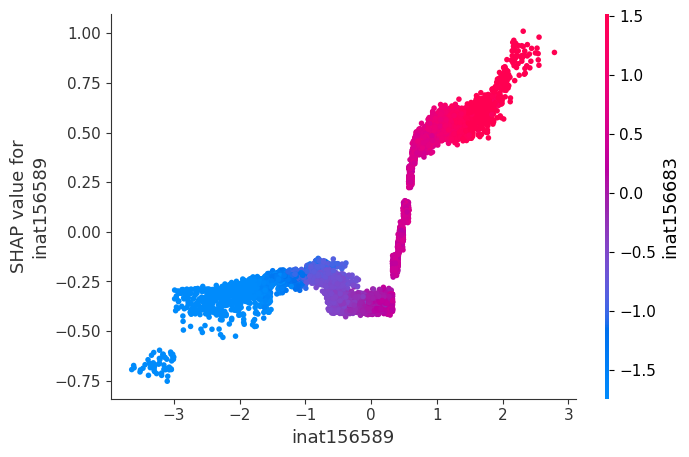

In [15]:
# plot SHAP values for lowthr feature in Low margin class (index 3) and use color to code value of rxminBN feature
shap.dependence_plot('inat156589',shap_values[81], X_train, feature_names=list(input_matrix.columns),
                     interaction_index = 'inat156683')
plt.show()